# Pynamical: demo of the logistic map and bifurcation diagrams

Author: Geoff Boeing

http://geoffboeing.com/2015/03/chaos-theory-logistic-map/

This notebook implements a logistic map and plots its results, bifurcation diagrams, and phase diagrams

In [1]:
from pynamical import logistic_model, bifurcation_plot, save_fig, title_font, label_font
import pandas as pd, numpy as np, IPython.display as display, matplotlib.pyplot as plt, matplotlib.cm as cm
%matplotlib inline

## First, let's see the population values the logistic map produces for a range of growth rate parameters

In [2]:
# run the logistic model for 20 generations for 7 growth rates between 0.5 and 3.5 then view the output
pops = logistic_model(num_gens=20, rate_min=0.5, rate_max=3.5, num_rates=7)
pops.applymap(lambda x: '{:03.3f}'.format(x))

,0.5,1.0,1.5,2.0,2.5,3.0,3.5
0,0.500,0.500,0.500,0.500,0.500,0.500,0.500
1,0.125,0.250,0.375,0.500,0.625,0.750,0.875
2,0.055,0.188,0.352,0.500,0.586,0.562,0.383
3,0.026,0.152,0.342,0.500,0.607,0.738,0.827
4,0.013,0.129,0.338,0.500,0.597,0.580,0.501
5,0.006,0.112,0.335,0.500,0.602,0.731,0.875
6,0.003,0.100,0.334,0.500,0.599,0.590,0.383
7,0.002,0.090,0.334,0.500,0.600,0.726,0.827
8,0.001,0.082,0.334,0.500,0.600,0.597,0.501
9,0.000,0.075,0.333,0.500,0.600,0.722,0.875


In [3]:
def get_colors(cmap, n, start=0., stop=1., alpha=1., reverse=False):
    '''return n-length list of rgba colors from the passed colormap name and alpha,
       limit extent by start/stop values and reverse list order if flag is true'''
    colors = [cm.get_cmap(cmap)(x) for x in np.linspace(start, stop, n)]
    colors = [(r, g, b, alpha) for r, g, b, _ in colors]
    return list(reversed(colors)) if reverse else colors

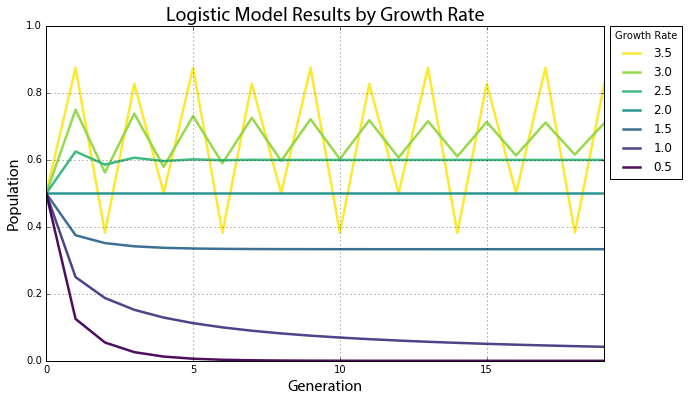

In [4]:
# plot the results of the logistic map run for these 7 different growth rates
#color_list = ['#cc00cc', '#4B0082', '#0066cc', '#33cc00', '#cccc33', '#ff9900', '#ff0000']
color_list = get_colors('viridis', n=len(pops.columns), start=0., stop=1)
for color, rate in reversed(zip(color_list, pops.columns)):
    ax = pops[rate].plot(kind='line', figsize=[10, 6], linewidth='2.5', alpha=0.95, c=color)
ax.grid(True)
ax.set_ylim([0, 1])
ax.set_title('Logistic Model Results by Growth Rate', fontproperties=title_font)
ax.set_xlabel('Generation', fontproperties=label_font)
ax.set_ylabel('Population', fontproperties=label_font)
ax.legend(title='Growth Rate', loc=3, bbox_to_anchor=(1, 0.525))

save_fig('logistic-map-growth-rates')
plt.show()

## Now let's visualize the system attractors for a large range of growth rate parameters, using bifurcation diagrams

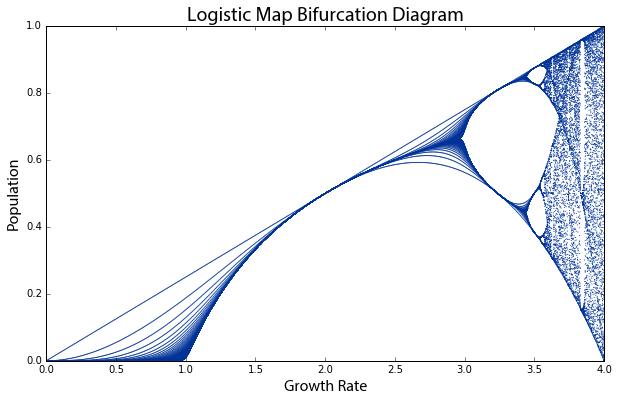

In [5]:
# run the model for 100 generations across 1000 growth rate steps from 0 to 4 then plot the bifurcation diagram
pops = logistic_model(num_gens=100, rate_min=0, rate_max=4, num_rates=1000, num_discard=1)
bifurcation_plot(pops, filename='logistic-map-bifurcation-0')

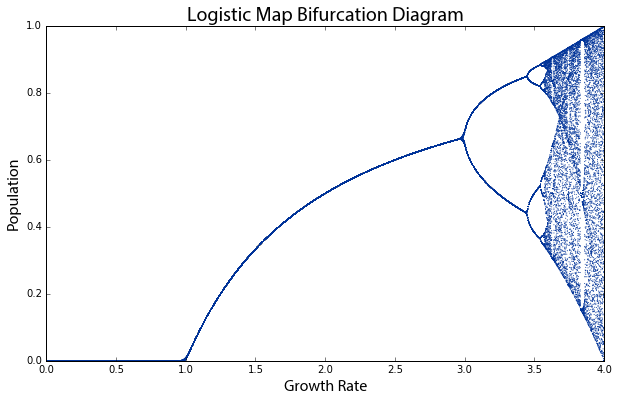

In [6]:
# plot the bifurcation diagram for 200 generations, but this time throw out the first 100 rows
# 200-100=100, so we still have 100 generations in the plot, just like in the previous cell
# this will show us only the attractors (aka, the values that each growth rate settles on over time)
pops = logistic_model(num_gens=100, rate_min=0, rate_max=4, num_rates=1000, num_discard=100)
bifurcation_plot(pops, filename='logistic-map-bifurcation-1')

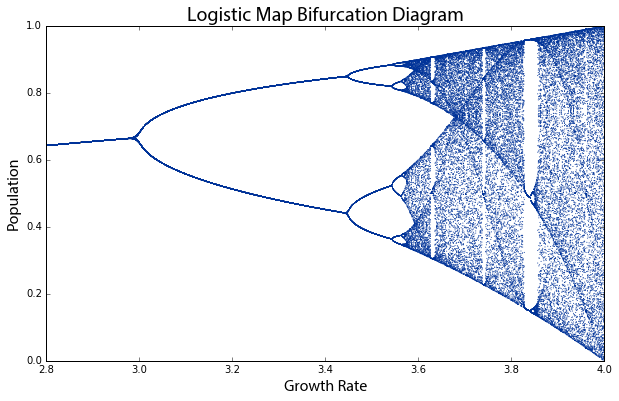

In [7]:
# run the model for 300 generations across 1,000 growth rate steps from 2.8 to 4, and plot the bifurcation diagram
# this plot is a zoomed-in look at the first plot and shows the period-doubling path to chaos
pops = logistic_model(num_gens=100, rate_min=2.8, rate_max=4, num_rates=1000, num_discard=200, initial_pop=0.1)
bifurcation_plot(pops, xmin=2.8, xmax=4, filename='logistic-map-bifurcation-2')

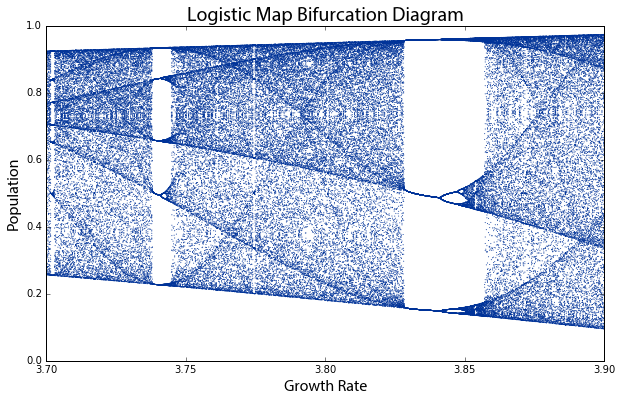

In [8]:
# run the model for 200 generations across 1,000 growth rate steps from 3.7 to 3.9, and plot the bifurcation diagram
# this plot is a zoomed-in look at the first plot and shows more detail in the chaotic regimes
pops = logistic_model(num_gens=100, rate_min=3.7, rate_max=3.9, num_rates=1000, num_discard=100)
bifurcation_plot(pops, xmin=3.7, xmax=3.9, filename='logistic-map-bifurcation-3')

## In the chaotic regime (r=3.6 to 4=4.0), the system has a strange attractor with fractal structure

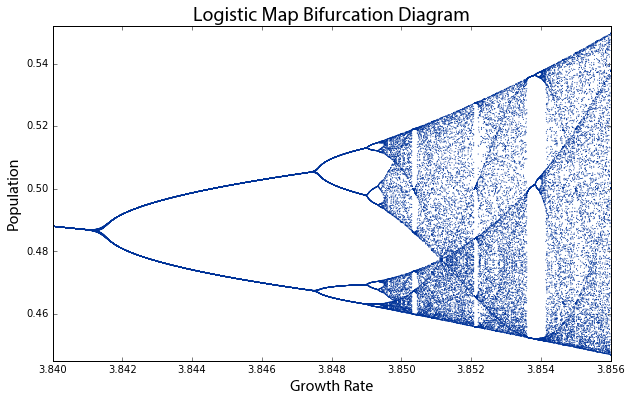

In [9]:
# run the model for 500 generations across 1,000 growth rate steps from 3.84 to 3.856, and plot the bifurcation diagram
# throw out the first 300 generations, so we end up with 200 generations in the plot
# this plot is a zoomed-in look at the first plot and shows the same structure we saw at the macro-level
pops = logistic_model(num_gens=200, rate_min=3.84, rate_max=3.856, num_rates=1000, num_discard=300)
bifurcation_plot(pops, xmin=3.84, xmax=3.856, ymin=0.445, ymax=0.552, filename='logistic-map-bifurcation-4')

## Now let's visualize the system's sensitive dependence on initial conditions

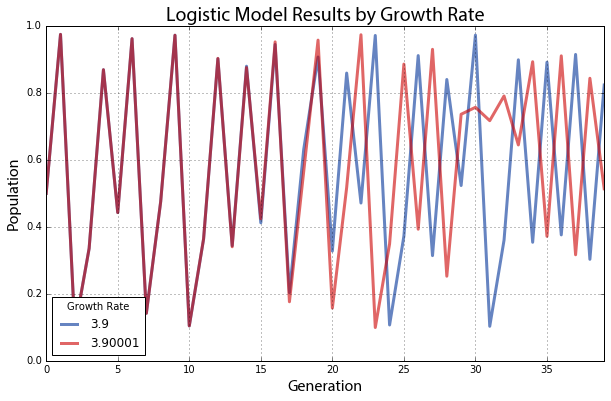

In [10]:
# plot the numeric output of the logistic model for growth rates of 3.9 and 3.90001
# this demonstrates sensitive dependence on the parameter
rate1 = 3.9
rate2 = rate1 + 0.00001

pops = logistic_model(num_gens=40, rate_min=rate1, rate_max=rate2, num_rates=2)
ax = pops.plot(kind='line', figsize=[10, 6], linewidth='3', alpha=0.6, style=['#003399','#cc0000'])
ax.grid(True)
ax.set_title('Logistic Model Results by Growth Rate', fontproperties=title_font)
ax.set_xlabel('Generation', fontproperties=label_font)
ax.set_ylabel('Population', fontproperties=label_font)
ax.legend(title='Growth Rate', loc=3)

save_fig('logistic-map-parameter-sensitivity')
plt.show()

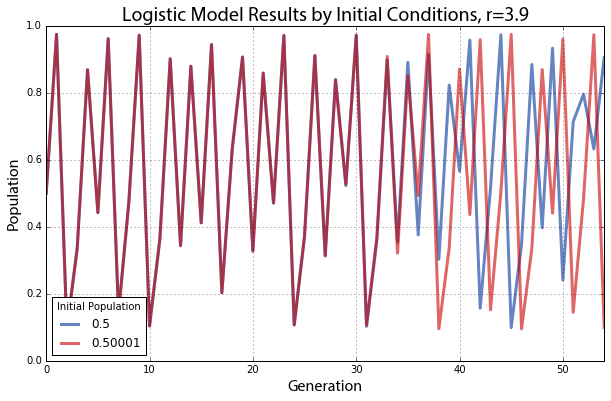

In [11]:
# plot the numeric output of the logistic model at growth rate 3.9 for 2 similar starting population values
# this demonstrates sensitive dependence on initial conditions, as they diverge through chaos
r = 3.9
pops1 = logistic_model(num_gens=55, rate_min=r, rate_max=4.0, num_rates=1, initial_pop=0.5)
pops2 = logistic_model(num_gens=55, rate_min=r, rate_max=4.0, num_rates=1, initial_pop=0.50001)
pops = pd.concat([pops1, pops2], axis=1)
pops.columns = ['0.5', '0.50001']
ax = pops.plot(kind='line', figsize=[10, 6], linewidth='3', alpha=0.6, style=['#003399','#cc0000'])
ax.grid(True)
ax.set_title('Logistic Model Results by Initial Conditions, r={}'.format(r), fontproperties=title_font)
ax.set_xlabel('Generation', fontproperties=label_font)
ax.set_ylabel('Population', fontproperties=label_font)
ax.legend(title='Initial Population', loc=3)

save_fig('logistic-map-initial-conditions')
plt.show()

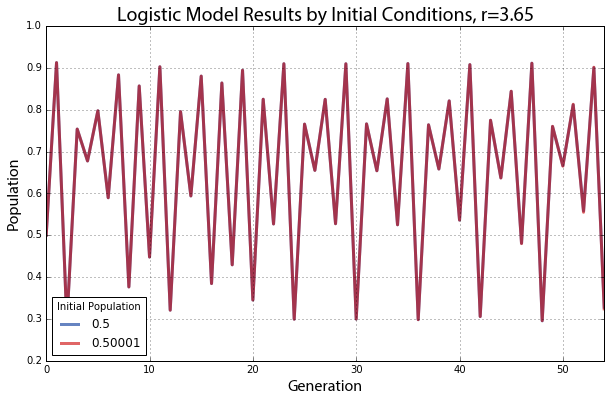

In [12]:
# plot the numeric output of the logistic model at growth rate 3.65 for 2 similar starting population values
# this demonstrates how very similar conditions do not diverge when the rate is not chaotic
r = 3.65
pops1 = logistic_model(num_gens=55, rate_min=r, num_rates=1, initial_pop=0.5)
pops2 = logistic_model(num_gens=55, rate_min=r, num_rates=1, initial_pop=0.50001)
pops = pd.concat([pops1, pops2], axis=1)
pops.columns = ['0.5', '0.50001']
ax = pops.plot(kind='line', figsize=[10, 6], linewidth='3', alpha=0.6, style=['#003399','#cc0000'])
ax.grid(True)
ax.set_title('Logistic Model Results by Initial Conditions, r={}'.format(r), fontproperties=title_font)
ax.set_xlabel('Generation', fontproperties=label_font)
ax.set_ylabel('Population', fontproperties=label_font)
ax.legend(title='Initial Population', loc=3)

save_fig('logistic-map-initial-conditions-stable')
plt.show()

## In part 2, I look at phase diagrams that let us visualize our strange attractors and disambiguate chaos from random noise:

[pynamical-demo-phase-diagrams.ipynb](pynamical-demo-phase-diagrams.ipynb)

In [13]:
# here's an example of the phase diagrams that I create in pynamical-demo-phase-diagrams.ipynb
display.Image(url='images/3d-logistic-map-attractor-1.png', width=500)

## For more information about chaos theory, the logistic map, bifurcation plots, phase diagrams, and strange attractors, check out my write-up:
http://geoffboeing.com/2015/03/chaos-theory-logistic-map/

and

http://geoffboeing.com/2015/04/visualizing-chaos-and-randomness/